### 점수 규칙
* 각각의 이동은 -1점. 가능한 한 최소한의 행동으로 이동할 것
* 승객을 태워다 주면 +20점
* 엉뚱한 상황에서 pickup 및 dropoff 할 경우 -10점

### 행동
* 0 : 남
* 1 : 북
* 2 : 동
* 3 : 서
* 4 : 승객 태우기
* 5 : 승객 내려주기

### 렌더링 정보
* blue: 승객
* magenta: 목적지
* yellow: 빈 택시
* green: 승객이 타고 있는 택시
* 기타 문자: 장소

### 상태
* 500개의 상태, 25개의 택시 위치
* 택시 내부를 포함한 5개의 가능한 승객의 위치
* 4개의 목적지 장소

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random

env = gym.make('Taxi-v3')

In [2]:
def rargmax(vector):     
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

In [3]:
# Q를 모두 0으로 초기화.  Q[500,6]
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [4]:
rList = []

num_episodes = 1000
for i in range(num_episodes):
    state = env.reset()[0]
    rAll = 0
    done = False
    tries = 0
    while not done:
        tries+=1
        action = rargmax(Q[state,:])
        new_state, reward, done, _, info = env.step(action)
        
        Q[state,action] = reward + np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Success rate: -16.891
Final Q-Table Values
LEFT DOWN RIGHT UP PICKUP DROPOFF


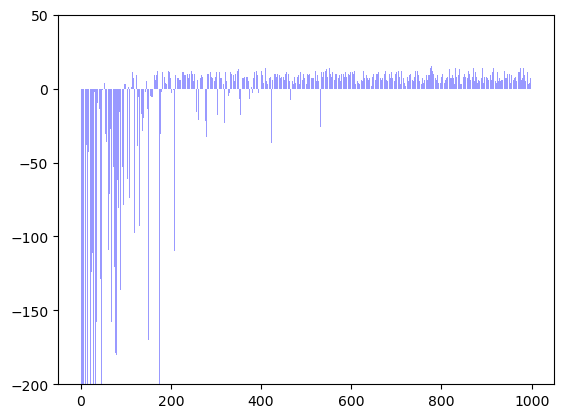

In [5]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP PICKUP DROPOFF")

plt.bar(range(len(rList)), rList, color="b", alpha=0.4)
plt.ylim(-200,50)
plt.show()